In [62]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Import recall score to calculate sensitivity/recall
from sklearn.metrics import recall_score

# Import precision score to calculate precision
from sklearn.metrics import precision_score

# Overall accuracy: train_test_split function
from sklearn.model_selection import train_test_split

# Accuracy Score: Added step onto train test split to do Cross Validation: get better sense of accuracy
from sklearn.model_selection import cross_val_score

### Train Data: Yelp!

In [63]:
# Grab and process the raw data.
yelp_path = 'Chall-2_2_7/yelp_labelled.txt'          
yelp_raw = pd.read_csv(yelp_path, delimiter= '\t', header=None)
yelp_raw.columns = ['sentance', 'score']

In [64]:
neg_words = ['nasty', 'angry', 'didn\'t', 'slow',
             'dirty', 'overpriced', 'underwhelming',
             'rude', 'cold', 'bad', 'forever']

pos_words = ['love', 'great', 'highly', 'pleasure', 'amazing', 'pleasure', 'good',
              'fav', 'excellent']

for key in pos_words:
    yelp_raw[str(key)] = yelp_raw.sentance.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [65]:
yelp_raw_pos = yelp_raw.loc[yelp_raw['score'] == 1]
yelp_raw_neg = yelp_raw.loc[yelp_raw['score'] == 0]
yelp_raw_pos.head()

,sentance,score,love,great,highly,pleasure,amazing,good,fav,excellent
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False
8,The fries were great too.,1,False,True,False,False,False,False,False,False
9,A great touch.,1,False,True,False,False,False,False,False,False


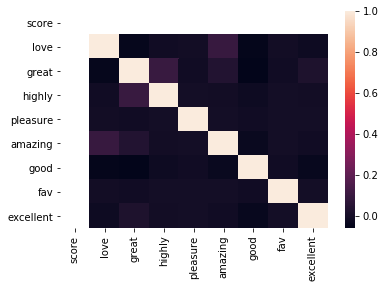

In [66]:
sns.heatmap(yelp_raw_pos.corr())

In [67]:
# Identify the data using 
data_yelp = yelp_raw[pos_words]
target_yelp = yelp_raw['score']

### Test Data: Yelp!

In [68]:
# Instantiate our model and store it in a new variable.
bnb_yelp = BernoulliNB()

# Fit our model to the data.
bnb_yelp = bnb_yelp.fit(data_yelp, target_yelp)

# Classify, storing the result in a new variable.
y_pred = bnb_yelp.predict(data_yelp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_yelp.shape[0],
    (target_yelp != y_pred).sum()
))


# Fit Bernoulli model to the Yelp! Initial data and target
bnb_fit_yelp = bnb_yelp.fit(data_yelp, target_yelp)

# Classify, storing the result in a new variable.
y_pred_yelp = bnb_yelp.predict(data_yelp)

#BNB Fit Score Initial:
X_train, X_test, y_train, y_test = train_test_split(
    data_yelp, target_yelp, test_size=0.3, random_state=0)

print('Bernoulli Model Accuracy Score Yelp! - Test Size = 30%: ', bnb_fit_yelp.score(X_test, y_test))

print()

# Accuracy Score Initial:
print('Yelp! Accuracy Score: ', accuracy_score(target_yelp, y_pred_yelp))

print()

# Cross Validation Accuracy Score Initial:
cross_val_yelp = cross_val_score(bnb_fit_yelp, data_yelp, target_yelp, cv=5)

print('Yelp! Cross Validation Scores:\n', cross_val_yelp)

print()

# Initial confusion matrix:
confusion_yelp = confusion_matrix(target_yelp, y_pred_yelp)
print('Yelp! Confusion Matrix: \n', confusion_yelp)

print(
    '\nTrue Positve: ', confusion_yelp[1,1],
    '\nTrue Negative: ', confusion_yelp[0,0]
)

print(
      '\nFalse Positive: ', confusion_yelp[0,1],
      '\nFalse Negative: ', confusion_yelp[1,0],    
)

print()

# Preparation to calculate sensitivity and specificity
# https://heartbeat.fritz.ai/classification-model-evaluation-90d743883106

# True Positives
TP_yelp = confusion_yelp[1, 1]

# True Negatives
TN_yelp = confusion_yelp[0, 0]

# False Positives
FP_yelp = confusion_yelp[0, 1]

# False Negatives
FN_yelp = confusion_yelp[1, 0]


# Calculate Sensitivity and Specificity - AMAZON
print('Yelp! Sensitivity (true pos): ', recall_score(target_yelp, y_pred_yelp, average=None)[0], '%')
print('Yelp! Specificity (true neg): ', recall_score(target_yelp, y_pred_yelp, average=None)[1], '%')

print()

# Calculate Precision: ratio of correct predictions to the total no. of predicted correct predictions
print('Average Precision Score: ', precision_score(target_yelp, y_pred_yelp, average='binary'))

print()

# Mislabelled data
print('Incorrectly Labelled Points:')
print('{} out of {}'.format(
    (target_yelp != y_pred_yelp).sum(),
    yelp_raw_pos.shape[0]
    
))

print()

# Correctly labelled data
print('Correctly Labelled Points:')
print("{} out of {}".format(
    (target_yelp == y_pred_yelp).sum(),
    data_yelp.shape[0]
    
))

# Correctly labelled data
print('\nCorrectly Labeled Predictors of Yelp! Positive Reviews:\n')
print(yelp_raw_pos[pos_words].sum().sort_values(ascending=False))

# Inorrectly labelled data
print('\nInorrectly Labeled Predictors of Yelp! Positive Reviews:\n')
print(yelp_raw_neg[pos_words].sum().sort_values(ascending=False))

Number of mislabeled points out of a total 1000 points : 412
Bernoulli Model Accuracy Score Yelp! - Test Size = 30%:  0.56

Yelp! Accuracy Score:  0.588

Yelp! Cross Validation Scores:
 [0.595 0.59  0.565 0.59  0.59 ]

Yelp! Confusion Matrix: 
 [[482  18]
 [394 106]]

True Positve:  106 
True Negative:  482

False Positive:  18 
False Negative:  394

Yelp! Sensitivity (true pos):  0.964 %
Yelp! Specificity (true neg):  0.212 %

Average Precision Score:  0.8548387096774194

Incorrectly Labelled Points:
412 out of 500

Correctly Labelled Points:
588 out of 1000

Correctly Labeled Predictors of Yelp! Positive Reviews:

good         42
great        38
love         13
excellent     8
amazing       6
highly        2
fav           1
pleasure      1
pleasure      1
dtype: int64

Inorrectly Labeled Predictors of Yelp! Positive Reviews:

good         14
love          3
amazing       1
excellent     0
fav           0
pleasure      0
pleasure      0
highly        0
great         0
dtype: int64


### Test Data: Amazon

In [69]:
amazon_path = 'Chall-2_2_7/amazon_cells_labelled.txt'
amazon_raw = pd.read_csv(amazon_path, delimiter= '\t', header=None)
amazon_raw.columns = ['sentance', 'score']

In [70]:
pos_words_2 = ['love', 'great', 'highly', 'pleasure', 'amazing', 'pleasure', 'good',
              'fav', 'excellent']

for key in pos_words_2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.sentance.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [71]:
amazon_raw_pos = amazon_raw.loc[amazon_raw['score'] == 1]
amazon_raw_neg = amazon_raw.loc[amazon_raw['score'] == 0]

In [72]:
# Identify the data using 
data_amazon = amazon_raw[pos_words_2]
target_amazon = amazon_raw['score']
data_amazon.head()

,love,great,highly,pleasure,amazing,pleasure,good,fav,excellent
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [73]:
# Instantiate our model and store it in a new variable.
bnb_amazon = BernoulliNB()

# Fit our model to the data.
bnb_amazon = bnb_amazon.fit(data_amazon, target_amazon)

# Classify, storing the result in a new variable.
y_pred = bnb_amazon.predict(data_amazon)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_amazon.shape[0],
    (target_amazon != y_pred).sum()
))


# Fit Bernoulli model to the IMDB Initial data and target
bnb_fit_amazon = bnb_amazon.fit(data_amazon, target_amazon)

# Classify, storing the result in a new variable.
y_pred_amazon = bnb_amazon.predict(data_amazon)

#BNB Fit Score Initial:
X_train, X_test, y_train, y_test = train_test_split(
   data_amazon, target_amazon, test_size=0.3, random_state=0)

print('Bernoulli Model Accuracy Score AMAZON - Test Size = 30%: ', bnb_fit_amazon.score(X_test, y_test))

print()

# Accuracy Score Initial:
print('AMAZON Accuracy Score: ', accuracy_score(target_amazon, y_pred_amazon))

print()

# Cross Validation Accuracy Score Initial:
cross_validation_amazon = cross_val_score(bnb_fit_amazon, data_amazon, target_amazon, cv=5)

print('AMAZON Cross Validation Scores:\n', cross_validation_amazon)

print()

# Initial confusion matrix:
c_matrix_amazon = confusion_matrix(target_amazon, y_pred_amazon)
print('AMAZON Confusion Matrix: \n', confusion_amazon)

print(
    '\nTrue Positve: ', c_matrix_amazon[1,1],
    '\nTrue Negative: ', c_matrix_amazon[0,0]
)

print(
      '\nFalse Positive: ', c_matrix_amazon[0,1],
      '\nFalse Negative: ', c_matrix_amazon[1,0],    
)

print()

# Preparation to calculate sensitivity and specificity
# https://heartbeat.fritz.ai/classification-model-evaluation-90d743883106

# True Positives
TP_amazon = c_matrix_amazon[1, 1]

# True Negatives
TN_amazon = c_matrix_amazon[0, 0]

# False Positives
FP_amazon = c_matrix_amazon[0, 1]

# False Negatives
FN_amazon = c_matrix_amazon[1, 0]


# Calculate Sensitivity and Specificity - AMAZON
print('AMAZON Sensitivity (true pos): ', recall_score(target_amazon, y_pred_amazon, average=None)[0], '%')
print('AMAZON Specificity (true neg): ', recall_score(target_amazon, y_pred_amazon, average=None)[1], '%')

print()

# Calculate Precision: ratio of correct predictions to the total no. of predicted correct predictions
print('Average Precision Score: ', precision_score(target_amazon, y_pred_amazon, average='binary'))

print()

# Mislabelled data
print('Incorrectly Labelled Points:')
print('{} out of {}'.format(
    (target_amazon != y_pred_amazon).sum(),
    amazon_raw_pos.shape[0]
    
))

print()

# Correctly labelled data
print('Correctly Labelled Points:')
print("{} out of {}".format(
    (target_amazon == y_pred_amazon).sum(),
    data_amazon.shape[0]
    
))

# Correctly labelled data
print('\nCorrectly Labeled Predictors of AMAZON Positive Reviews:\n')
print(amazon_raw_pos[pos_words_2].sum().sort_values(ascending=False))

# Inorrectly labelled data
print('\nInorrectly Labeled Predictors of AMAZON Positive Reviews:\n')
print(amazon_raw_neg[pos_words_2].sum().sort_values(ascending=False))

Number of mislabeled points out of a total 1000 points : 417
Bernoulli Model Accuracy Score AMAZON - Test Size = 30%:  0.5866666666666667

AMAZON Accuracy Score:  0.583

AMAZON Cross Validation Scores:
 [0.59  0.59  0.595 0.58  0.56 ]

AMAZON Confusion Matrix: 
 [[486  14]
 [403  97]]

True Positve:  97 
True Negative:  486

False Positive:  14 
False Negative:  403

AMAZON Sensitivity (true pos):  0.972 %
AMAZON Specificity (true neg):  0.194 %

Average Precision Score:  0.8738738738738738

Incorrectly Labelled Points:
417 out of 500

Correctly Labelled Points:
583 out of 1000

Correctly Labeled Predictors of AMAZON Positive Reviews:

good         38
great        32
love         16
excellent     8
highly        7
fav           0
pleasure      0
amazing       0
pleasure      0
dtype: int64

Inorrectly Labeled Predictors of AMAZON Positive Reviews:

good         12
highly        1
great         1
excellent     0
fav           0
pleasure      0
amazing       0
pleasure      0
love       

### Test Data w/ Add'l Features: Amazon

In [74]:
amazon_path_2 = 'Chall-2_2_7/amazon_cells_labelled.txt'
amazon_raw_2 = pd.read_csv(amazon_path, delimiter= '\t', header=None)
amazon_raw_2.columns = ['sentance', 'score']

In [222]:
pos_words_a2 = ['love', 'great', 'highly', 'very good', 'handy', 'favorite', 'excellent',
                'nice', 'incredible', 'sturdy', 'best', 'perfectly', 'beautiful',
                'really like', 'happy', 'well', 'ideal', 'glad', 'joy', 'comfort']

for pos_word_a2 in pos_words_a2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw_2[str(pos_word_a2)] = amazon_raw_2.sentance.str.contains(
        ' ' + str(pos_word_a2) + ' ',
        case=False
    )

In [223]:
amazon_raw_pos_2 = amazon_raw_2.loc[amazon_raw_2['score'] == 1]
amazon_raw_neg_2 = amazon_raw_2.loc[amazon_raw_2['score'] == 0]

In [227]:
data_amazon_2 = amazon_raw_2[pos_words_a2]
target_amazon_2 = amazon_raw_2['score']

In [226]:
# Instantiate our model and store it in a new variable.
bnb_amazon_2 = BernoulliNB()

# Fit Bernoulli model to the IMDB play data and target
bnb_amazon_2 = bnb_amazon_2.fit(data_amazon_2, target_amazon_2)

# Classify, storing the result in a new variable.
y_pred_amazon_2 =bnb_amazon_2.predict(data_amazon_2)

#BNB Fit Score:
X_train, X_test, y_train, y_test = train_test_split(
   data_amazon_2, target_amazon_2, test_size=0.3, random_state=0)

print('Bernoulli Model Accuracy Score Test Size = 30%: ', bnb_amazon_2.score(X_test, y_test))

print()

# Accuracy Score:
print('Amazon 2 Accuracy Score: ', accuracy_score(target_amazon_2, y_pred_amazon_2))

print()

# Cross Validation Accuracy Score:
cross_validation_amazon_2 = cross_val_score(bnb_amazon_2, data_amazon_2, target_amazon_2, cv=5)

print('Amazon 2 Cross Validation Scores:\n', cross_validation_amazon_2)
print('\n','Amazon Cross Validation Scores:\n', cross_validation_amazon)

print()

# Play confusion matrix:
c_matrix_amazon_2 = confusion_matrix(target_amazon_2, y_pred_amazon_2)
print('Amazon 2 Confusion Matrix: \n', c_matrix_amazon_2)

print(
    '\nAmazon 2 True Positve: ', c_matrix_amazon_2[1,1],
    '\n---> Amazon True Positve: ', c_matrix_amazon[1,1]
)
print(
    '\nAmazon 2 True Negative: ', c_matrix_amazon_2[0,0],
    '\n---> Amazon True Negative: ', c_matrix_amazon[0,0]
)

print(
    '\nAmazon 2 False Positive: ', c_matrix_amazon_2[0,1],
    '\n---> Amazon False Positive: ', c_matrix_amazon[0,1]
)

print(
    '\nAmazon 2 False Negative: ', c_matrix_amazon_2[1,0],
    '\n---> Amazon False Negative: ', c_matrix_amazon[1,0], 
)

print()

# Preparation to calculate sensitivity and specificity
# https://heartbeat.fritz.ai/classification-model-evaluation-90d743883106

# True Positives
TP_2 = c_matrix_amazon_2[1, 1]

# True Negatives
TN_2 = c_matrix_amazon_2[0, 0]

# False Positives
FP_2 = c_matrix_amazon_2[0, 1]

# False Negatives
FN_2 = c_matrix_amazon_2[1, 0]


# Calculate Sensitivity and Specificity
print('Amazon 2 Sensitivity (true pos): ', recall_score(target_amazon_2, y_pred_amazon_2, average=None)[0], '%')
print('--> Amazon Sensitivity (true pos): ', recall_score(target_amazon, y_pred_amazon, average=None)[0], '%')

print()

print('Amazon 2 Specificity (true neg): ', recall_score(target_amazon_2, y_pred_amazon_2, average=None)[1], '%')
print('--> Amazon Specificity (true neg): ', recall_score(target_amazon, y_pred_amazon, average=None)[1], '%')

print()

# Calculate Precision: ratio of correct predictions to the total no. of predicted correct predictions
print('Average Precision Score: ', precision_score(target_amazon_2, y_pred_amazon_2, average='binary'))

print()

# Mislabelled data
print('Incorrectly Labelled Points:')
print('{} out of {}'.format(
    (target_amazon_2 != y_pred_amazon_2).sum(),
    data_amazon_2.shape[0]
    
))

print()

# Correctly labelled data
print('Correctly Labelled Points:')
print("{} out of {}".format(
    (target_amazon_2 == y_pred_amazon_2).sum(),
    data_amazon_2.shape[0]
    
))

# Correctly labelled data
print('\nTrue Positives: Correctly Labeled Predictors of Positive Reviews:\n')
print(amazon_raw_pos_2[pos_words_a2].sum().sort_values(ascending=False))

# Incorrectly labelled data
print('\nFalse Positives: Incorrectly Labeled Predictors of Positive Reviews:\n')
print(amazon_raw_neg_2[pos_words_a2].sum().sort_values(ascending=False))

Bernoulli Model Accuracy Score Test Size = 30%:  0.62

Amazon 2 Accuracy Score:  0.619

Amazon 2 Cross Validation Scores:
 [0.62  0.59  0.63  0.635 0.59 ]

 Amazon Cross Validation Scores:
 [0.59  0.59  0.595 0.58  0.56 ]

Amazon 2 Confusion Matrix: 
 [[494   6]
 [375 125]]

Amazon 2 True Positve:  125 
---> Amazon True Positve:  97

Amazon 2 True Negative:  494 
---> Amazon True Negative:  486

Amazon 2 False Positive:  6 
---> Amazon False Positive:  14

Amazon 2 False Negative:  375 
---> Amazon False Negative:  403

Amazon 2 Sensitivity (true pos):  0.988 %
--> Amazon Sensitivity (true pos):  0.972 %

Amazon 2 Specificity (true neg):  0.25 %
--> Amazon Specificity (true neg):  0.194 %

Average Precision Score:  0.9541984732824428

Incorrectly Labelled Points:
381 out of 1000

Correctly Labelled Points:
619 out of 1000

True Positives: Correctly Labeled Predictors of Positive Reviews:

great          32
love           16
best           15
well           15
happy          11
nice    

### Observations after applying same features from Yelp! data to Amazon data and then comparing performance of models with varying features for the on the same data from Amazon:
#### Applying same features from Yelp! data to IMDB data:
- Very simplistic features, however performed fairly well.
- The largest variance as in specificity, change from 21% for Yelp! data to 19% for Amazon data
- An increase in features might further decrease specificity
- No overfit for Yelp! data as the accuracy remained flat. Possible underfitting.
- Best performering features are should provide comparable performance to different review datasets.
#### Increased features from the 1st to 2nd Amazon models:
- Increased sensitivity from 97% to 99%
- Increased specificity from 19% to 25%
- Removed the word 'good' as the increased sensitivity was not worth the trade-off in decreased sensitivity.
- RegEx features would been need for more specificity.